# Chemicals in our Water
By Russell0404, z5257037
#### --ABSTRACT-- 
Im just interested in general how the chemicals in large bodies of water react to each other.

I looked at two different datasets (found the second one when researching for the first)

#### -- Relevant sources--
[National Reference Station](http://imos.org.au/facilities/nationalmooringnetwork/nrs/)
<br>
[National Reference Station - Rationale](http://imos.org.au/fileadmin/user_upload/shared/ANMN/NRS_rationale_and_implementation_100811.pdf)
<br>
[My Data source](https://portal.aodn.org.au/)
<br>
[Ocean Accidification in the past decades](https://timeforchange.org/ocean-acidification-effect-of-global-warming)
<br>
[Ocean Acidification's counter: Carbon Sequestration](https://eos.org/editors-vox/preventing-climate-change-by-increasing-ocean-alkalinity)
<br>
[Ocean Properties](http://www.coexploration.org/bbsr/classroombats/html/ocean_properties.html)


In [31]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse


In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

#first path
my_csvs = {'Dataset - Water Quality/Torrens_Lake 2009~2014(UTF-8).csv': ' ',
           'Dataset - Water Quality/Torrens_Lake 2014~2015(UTF-8).csv': ' ',
           'Dataset - Water Quality/Torrens_Lake 2015~2016(UTF-8).csv': ' ',
           'Dataset - Water Quality/IMOS National Reference Station(NRS).csv': ' '
          } #raw content dataset

for data in my_csvs:
    my_csvs[data] = pd.read_csv(data)

#second path
os.path.isfile('Dataset - Water Quality/IMOS National Reference Station(NRS).csv')
Dataset = 'Dataset - Water Quality/IMOS National Reference Station(NRS).csv'
water_data = pd.read_csv(Dataset)

In [32]:
def str_to_date(row):
    if type(row.UTC_TRIP_START_TIME) is str:
        return parse(row.UTC_TRIP_START_TIME)
    else:
        print(row.UTC_TRIP_START_TIME)
        
water_data.apply(str_to_date, axis=1)


#some web_visuals

web_visuals = ["http://imos.org.au/fileadmin/_processed_/2/2/csm_eac_7eaa26b7f9.png", 
               "https://www.parks.sa.gov.au/files/sharedassets/parks/parks/flinders-ranges-outback/lake-torrens-national-park/laketorrens-arial-lake2-hero.jpg",
               "https://news.psu.edu/sites/default/files/styles/threshold-992/public/Harmful%20Algae%20Bloom%20%28Dr.%20Jennifer%20L.%20Graham%2C%20USGS%29.jpg?itok=D5PrfOTz", 
               "https://media.nature.com/m685/nature-assets/nature/journal/v488/n7413/images/nature11360-f1.2.jpg"]

visuals_name = ["currents.png", "torrens_lake.jpg", "algae_bloom.jpg", "CCD.jpg"] 

amount_of_visuals = 4

for x in range(amount_of_visuals):
    r = requests.get(web_visuals[x])
    with open(visuals_name[x], 'wb') as visuals_name[x]:
        visuals_name[x].write(r.content)

### Torrens Lake

- A National Park in South Australia
- Salty, eutrophicated lake

<img src="torrens_lake.jpg">

### Eutrophi...what?

- Eutrofication is a state which a body of water becomes oversaturated with nutrients
- excess nutrients (especially phosphurous/nitrogen) leads to algal boom 
- cyanobacteria uses up nutrients to produce algal bloom

##### Expectation:
More nutrients --> More plants --> More little fish --> More big fish...right?

##### Reality:
More nutrients --> More plants --> Too much plants --> Only plants



<img src="algae_bloom.jpg">

Text(0, 0.5, 'Value count')

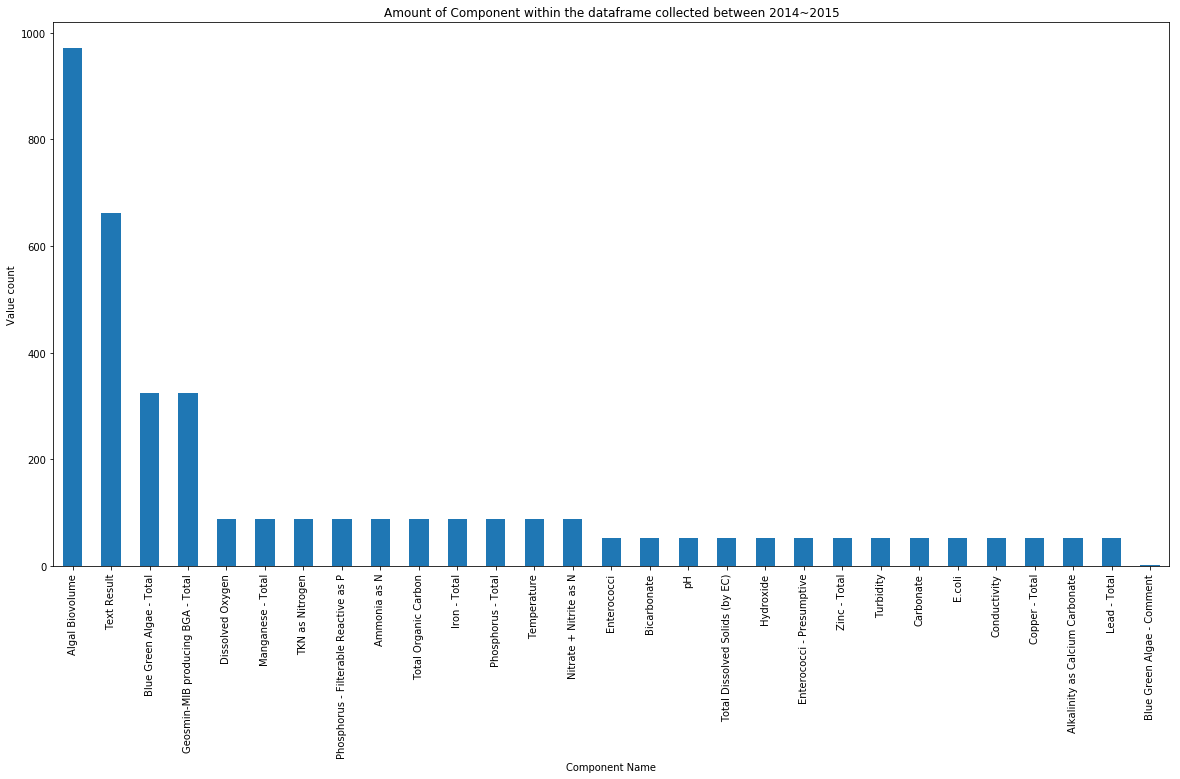

In [12]:
chemicals = my_csvs['Dataset - Water Quality/Torrens_Lake 2014~2015(UTF-8).csv']["Component Name"].value_counts()
chemicals[chemicals < 990].plot(kind="bar")

plt.title("Amount of Component within the dataframe collected between 2014~2015")
plt.xlabel("Component Name")
plt.ylabel("Value count")

Text(0, 0.5, 'Value count')

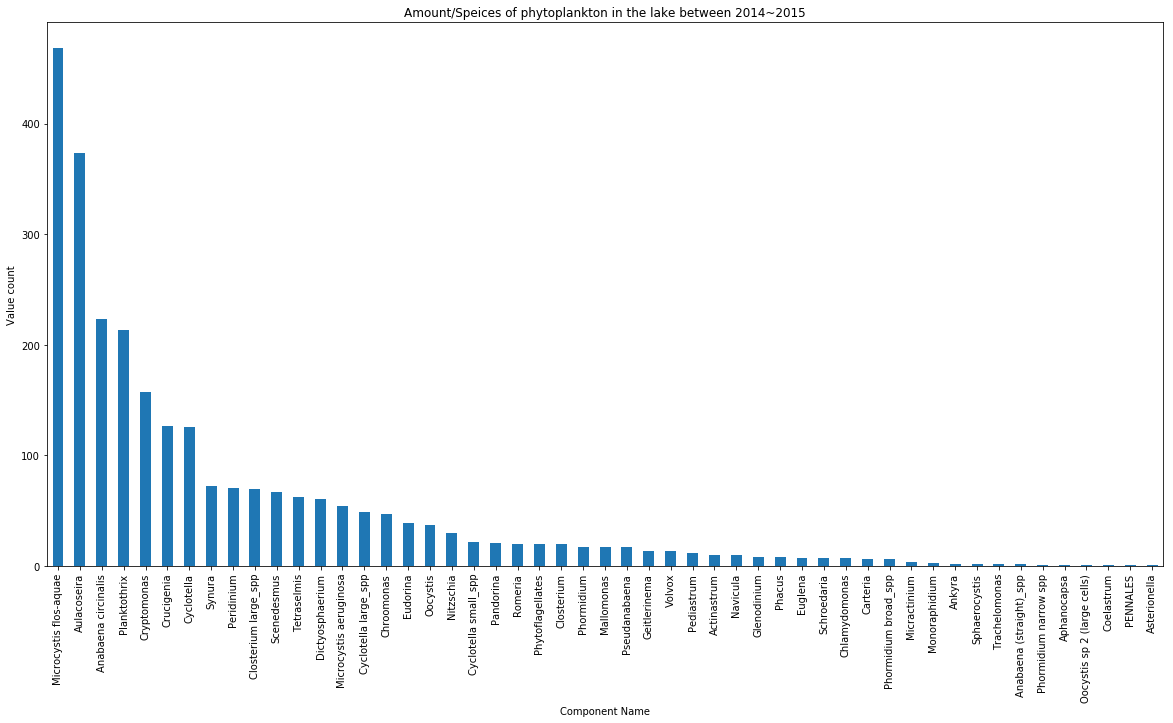

In [15]:
phytoplankton = my_csvs['Dataset - Water Quality/Torrens_Lake 2014~2015(UTF-8).csv']["Taxonomy Code"].value_counts()
phytoplankton[phytoplankton < 500].plot(kind="bar")

plt.title("Amount/Speices of phytoplankton in the lake between 2014~2015")
plt.xlabel("Component Name")
plt.ylabel("Value count")

### National Reference Stations (NRS)

- The Integrated Marine Ocean System (IMOS) and CSIRO collaborated to develop the National Reference Station (NRS) network in order to record the change in water quality over the course of decades. 
- Data is then extrapolated to evaluate the effects of the global ocean on the ecosystem of Australia's coasts. 
- Im just curious in general about how the chemical components in the Australian coasts has changed over the decade.



<img src="locations.png">
<img src="currents.png">

In [33]:
water_data

,STATION_NAME,NRS_SAMPLE_CODE,UTC_TRIP_START_TIME,LATITUDE,LONGITUDE,SAMPLE_DEPTH_M,SALINITY,SILICATE_UMOL_PER_L,NITRATE_UMOL_PER_L,PHOSPHATE_UMOL_PER_L,AMMONIUM_UMOL_PER_L,CO2_UMOL_PER_KG,ALKALINITY_UMOL_PER_KG,geom
0,Darwin,NRSDAR20110627_000,2011-06-27T04:18:00Z,-12.4000,130.7680,0.0,32.933,5.8,0.2,0.39,0.32,1922.49,2198.30,POINT (130.76805 -12.4)
1,Darwin,NRSDAR20110627_010,2011-06-27T04:18:00Z,-12.4000,130.7680,10.0,32.905,6.0,0.1,0.32,0.02,1931.90,2201.75,POINT (130.76805 -12.4)
2,Darwin,NRSDAR20110627_014,2011-06-27T04:18:00Z,-12.4000,130.7680,14.0,32.888,6.3,0.2,0.32,0.11,1931.42,2203.74,POINT (130.76805 -12.4)
3,Darwin,NRSDAR20111005_000,2011-06-27T04:18:00Z,-12.4000,130.7680,0.0,33.722,6.5,0.2,0.29,0.08,1993.13,2267.87,POINT (130.76805 -12.4)
4,Darwin,NRSDAR20111005_010,2011-06-27T04:18:00Z,-12.4000,130.7680,10.0,33.742,6.3,0.1,0.26,0.04,1988.61,2266.31,POINT (130.76805 -12.4)
5,Darwin,NRSDAR20111005_020,2011-06-27T04:18:00Z,-12.4000,130.7680,20.0,33.720,6.4,0.1,0.25,0.10,1983.96,2260.35,POINT (130.76805 -12.4)
6,Darwin,NRSDAR20120114_21:30_000,2011-06-27T04:18:00Z,-12.4000,130.7680,0.0,33.661,4.6,1.9,0.65,3.32,1962.64,2243.91,POINT (130.76805 -12.4)
7,Darwin,NRSDAR20120114_21:30_010,2011-06-27T04:18:00Z,-12.4000,130.7680,10.0,33.662,5.2,0.5,0.38,0.27,1962.82,2243.85,POINT (130.76805 -12.4)
8,Darwin,NRSDAR20120114_21:30_020,2012-01-14T21:30:00Z,-12.4000,130.7680,20.0,33.670,5.5,0.4,0.31,2.78,1961.57,2240.87,POINT (130.76805 -12.4)
9,Darwin,NRSDAR20120114_23:35_000,2012-01-14T23:35:00Z,-12.4000,130.7680,0.0,33.518,5.3,0.2,0.27,0.35,1948.68,2229.31,POINT (130.76805 -12.4)


In [33]:
#just a quick, general visualisation of the dataset 
#Made them into 2 Subsets


chemicals_1A   = ["NITRATE_UMOL_PER_L", "PHOSPHATE_UMOL_PER_L", "AMMONIUM_UMOL_PER_L"]
nitrate        = water_data["NITRATE_UMOL_PER_L"]
phosphate      = water_data['PHOSPHATE_UMOL_PER_L']
ammonium       = water_data["AMMONIUM_UMOL_PER_L"]

"""
Such chemicals naturally occur in the ocean via their own chemical cycles, however
high concentration of nitrates/phosphates/ammonium can be a possible sign of 
Increased effluent discharge (sewage) from the coasts.
"""
def nutrients(region):
    i = 0
    for x in chemicals_1A:
        region[chemicals_1A[i]][region[chemicals_1A[i]] >= 0].plot() #Gets rid of N/A results
        i += 1  
        
    plt.title("Chemical compound measured at Darwin (-12.4000, 130.7680) between 2011-2019 - 1B")    
    plt.legend(["Nitrate", "Phosphate", "Ammonium"])
    plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
    plt.ylabel("Measurements of total dissolved compound (Litres/Kilogram)")
  



chemicals_1B   = ["CO2_UMOL_PER_KG", "ALKALINITY_UMOL_PER_KG"]
carbon_dioxide = water_data["CO2_UMOL_PER_KG"] 
Akalinity      = water_data["ALKALINITY_UMOL_PER_KG"]
sample_depth   = water_data["SAMPLE_DEPTH_M"]

"""
Carbon dioxide is a HUGE factor to consider, when discussing the changing pH in ocean.
The recent increase in the greenhouse gas has already alarmed marine biologists to 
study the potential affect of the changing pH for marine animals. In fact, one of the
reasons marine animals cannot live in deep ocean is simply because the water is too acidic,
thus need to live at a depth above what is knowned as the Saturation Horizon. At the current
rate, by 2100 the ocean's acidity level will reach 150% of its current alkalinity level. 
"""

def co2_alkalinity(region):
    i = 0
    for x in chemicals_1B:
        region[chemicals_1B[i]][region[chemicals_1B[i]] >= 0].plot() #Gets rid of N/A results
        i += 1 
    
    plt.title("Chemical compound measured at Darwin (-12.4000, 130.7680) between 2011-2019 - 1B")    
    plt.legend(["Carbon Dioxide", "Akalinity"])
    plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
    plt.ylabel("Measurements of total dissolved compound (Moles/Kilogram)")
 
 
#Generating separate dataframes for all 9 National Reference Station

Darwin              = water_data[water_data.STATION_NAME == "Darwin"]
Esperance           = water_data[water_data.STATION_NAME == "Esperance"]
Kangaroo_Island     = water_data[water_data.STATION_NAME == "Kangaroo Island"]
Maria_Island        = water_data[water_data.STATION_NAME == "Maria Island"]
Ningaloo            = water_data[water_data.STATION_NAME == "Ningaloo"]
North_Stradbroke    = water_data[water_data.STATION_NAME == "North Stradbroke"]
Port_Hacking        = water_data[water_data.STATION_NAME == "Port Hacking"]
Rottnest_Island     = water_data[water_data.STATION_NAME == "Rottnest Island"]
Yongala             = water_data[water_data.STATION_NAME == "Yongala"]

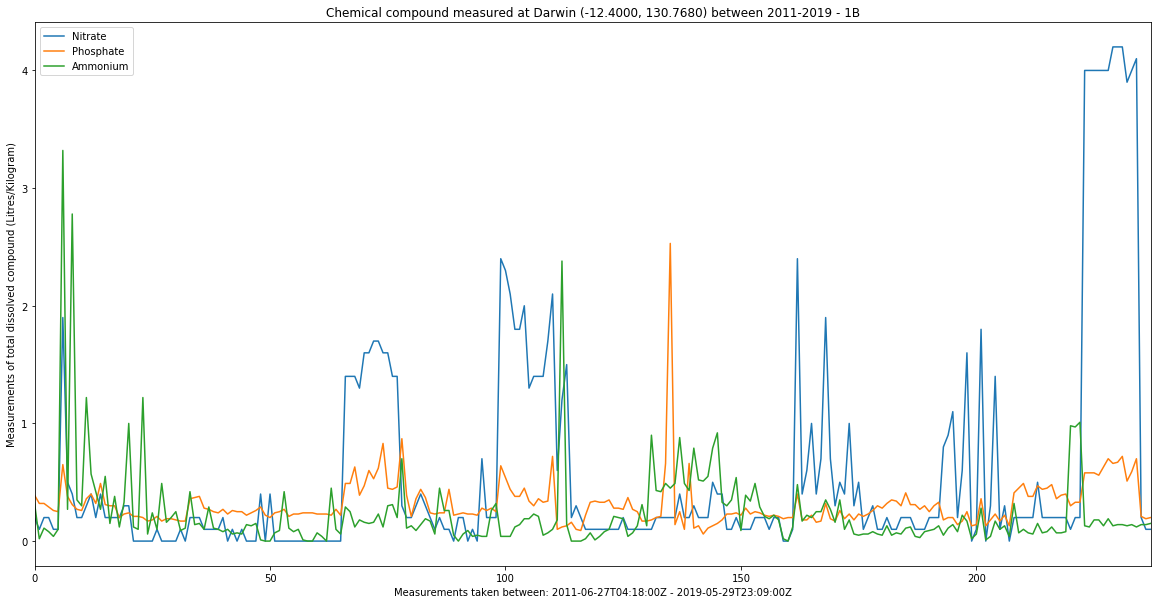

In [41]:
nutrients(Darwin)

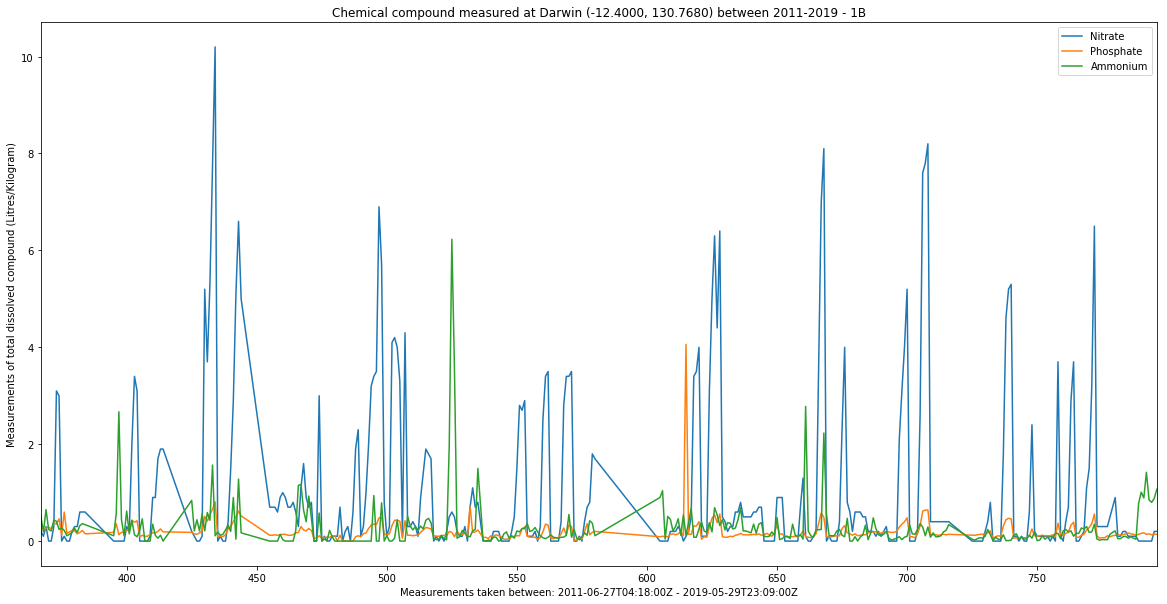

In [40]:
nutrients(Kangaroo_Island)

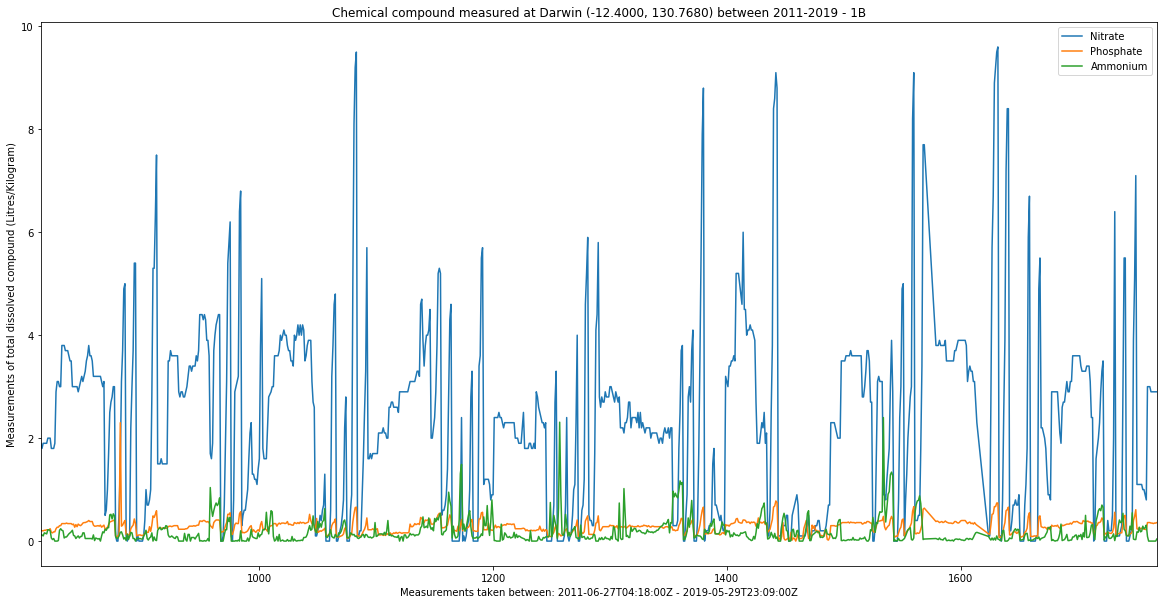

In [42]:
nutrients(Maria_Island)

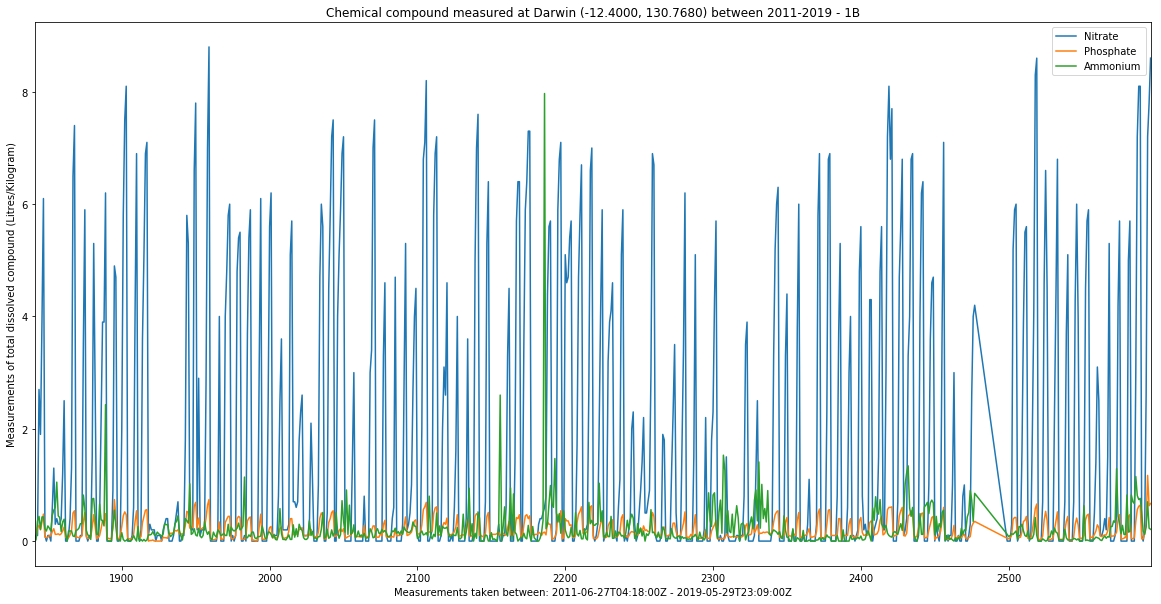

In [44]:
nutrients(North_Stradbroke)

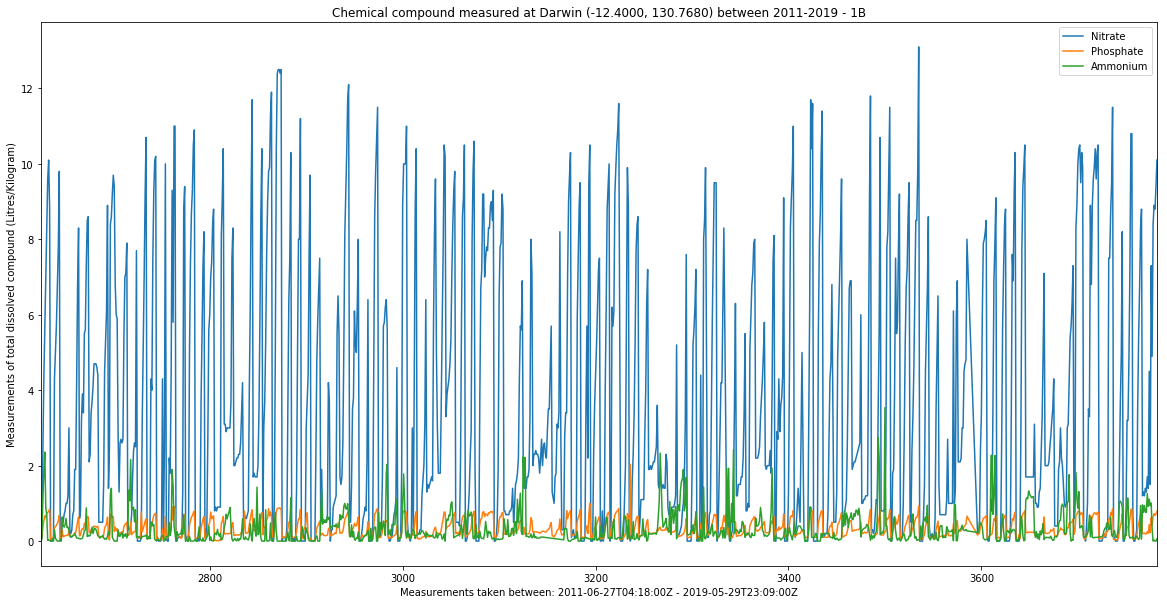

In [46]:
nutrients(Port_Hacking)

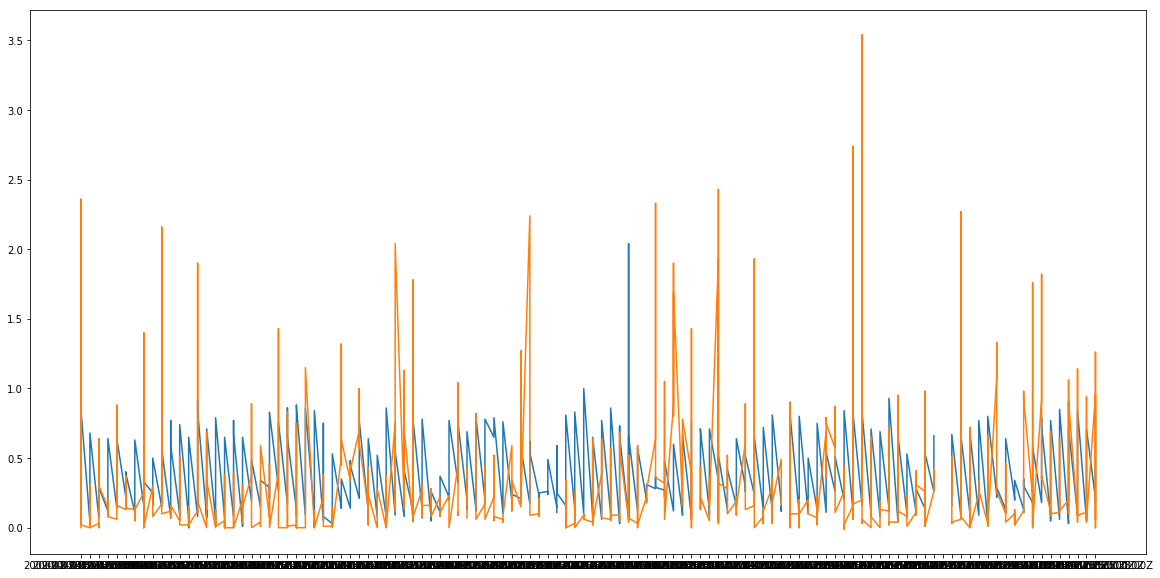

In [50]:
plt.plot(Port_Hacking["UTC_TRIP_START_TIME"], Port_Hacking["PHOSPHATE_UMOL_PER_L"])
plt.plot(Port_Hacking["UTC_TRIP_START_TIME"], Port_Hacking["AMMONIUM_UMOL_PER_L"])

In [48]:
Port_Hacking["SAMPLE_DEPTH_M"]

2625      0.0
2626     10.0
2627     20.0
2628     25.0
2629     30.0
2630     40.0
2631     50.0
2632     60.0
2633     75.0
2634    100.0
2635      0.0
2636     10.0
2637     20.0
2638     25.0
2639     30.0
2640     40.0
2641     50.0
2642     60.0
2643     75.0
2644    100.0
2645      0.0
2646     10.0
2647     20.0
2648     25.0
2649     30.0
2650     40.0
2651     50.0
2652     60.0
2653     75.0
2654    100.0
        ...  
3753     50.0
3754     60.0
3755     75.0
3756    100.0
3757      0.0
3758     10.0
3759     20.0
3760     25.0
3761     30.0
3762     40.0
3763     50.0
3764     60.0
3765     75.0
3766    100.0
3767      0.0
3768      0.0
3769     10.0
3770     10.0
3771     20.0
3772     20.0
3773     25.0
3774     30.0
3775     30.0
3776     40.0
3777     40.0
3778     50.0
3779     50.0
3780     60.0
3781     75.0
3782    100.0
Name: SAMPLE_DEPTH_M, Length: 1158, dtype: float64

In [51]:
Port_Hacking

,STATION_NAME,NRS_SAMPLE_CODE,UTC_TRIP_START_TIME,LATITUDE,LONGITUDE,SAMPLE_DEPTH_M,SALINITY,SILICATE_UMOL_PER_L,NITRATE_UMOL_PER_L,PHOSPHATE_UMOL_PER_L,AMMONIUM_UMOL_PER_L,CO2_UMOL_PER_KG,ALKALINITY_UMOL_PER_KG,geom
2625,Port Hacking,NRSPHB20090223_000,2009-02-23T22:27:00Z,-34.1192,151.2267,0.0,34.982,0.3,0.0,0.09,0.00,1985.40,2296.42,POINT (151.22667 -34.11923)
2626,Port Hacking,NRSPHB20090223_010,2009-02-23T22:27:00Z,-34.1192,151.2267,10.0,35.236,-0.1,0.1,0.11,0.06,NaN,NaN,POINT (151.22667 -34.11923)
2627,Port Hacking,NRSPHB20090223_020,2009-02-23T22:27:00Z,-34.1192,151.2267,20.0,35.398,0.9,2.4,0.35,1.14,NaN,NaN,POINT (151.22667 -34.11923)
2628,Port Hacking,NRSPHB20090223_025,2009-02-23T22:27:00Z,-34.1192,151.2267,25.0,35.424,1.9,4.3,0.54,1.82,2058.56,2321.29,POINT (151.22667 -34.11923)
2629,Port Hacking,NRSPHB20090223_030,2009-02-23T22:27:00Z,-34.1192,151.2267,30.0,35.418,2.5,5.6,0.67,2.36,NaN,NaN,POINT (151.22667 -34.11923)
2630,Port Hacking,NRSPHB20090223_040,2009-02-23T22:27:00Z,-34.1192,151.2267,40.0,35.472,2.4,7.0,0.62,0.89,2100.93,2325.36,POINT (151.22667 -34.11923)
2631,Port Hacking,NRSPHB20090223_050,2009-02-23T22:27:00Z,-34.1192,151.2267,50.0,35.435,3.5,8.2,0.74,0.71,NaN,NaN,POINT (151.22667 -34.11923)
2632,Port Hacking,NRSPHB20090223_060,2009-02-23T22:27:00Z,-34.1192,151.2267,60.0,35.413,3.8,9.6,0.76,0.02,2122.54,2334.04,POINT (151.22667 -34.11923)
2633,Port Hacking,NRSPHB20090223_075,2009-02-23T22:27:00Z,-34.1192,151.2267,75.0,35.390,4.3,10.1,0.78,0.03,2121.90,2321.51,POINT (151.22667 -34.11923)
2634,Port Hacking,NRSPHB20090223_100,2009-02-23T22:27:00Z,-34.1192,151.2267,100.0,35.356,6.4,8.8,0.85,0.02,2123.98,2320.05,POINT (151.22667 -34.11923)


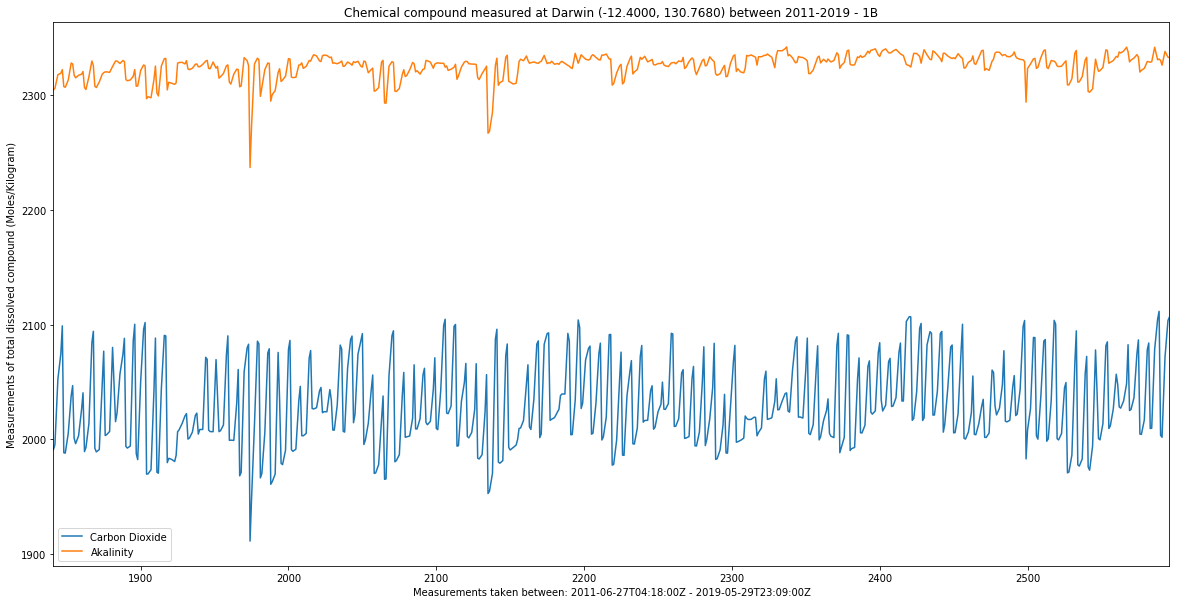

In [63]:
co2_alkalinity(North_Stradbroke)

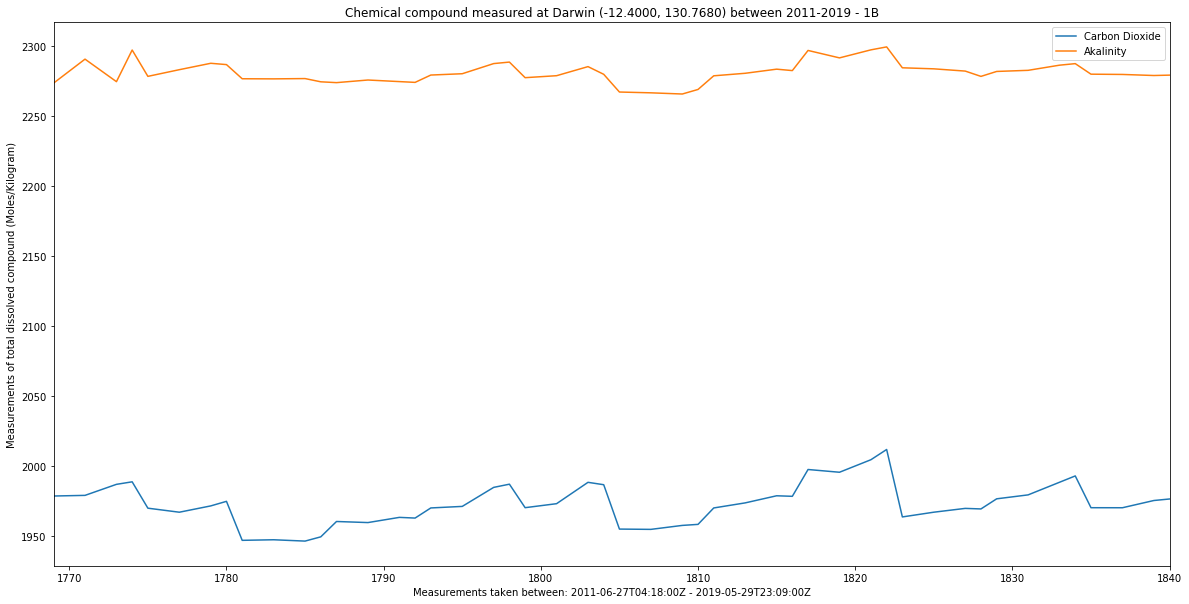

In [62]:
co2_alkalinity(Ningaloo)

Text(0, 0.5, 'Measurements of total dissolved compound (Moles/Kilogram)')

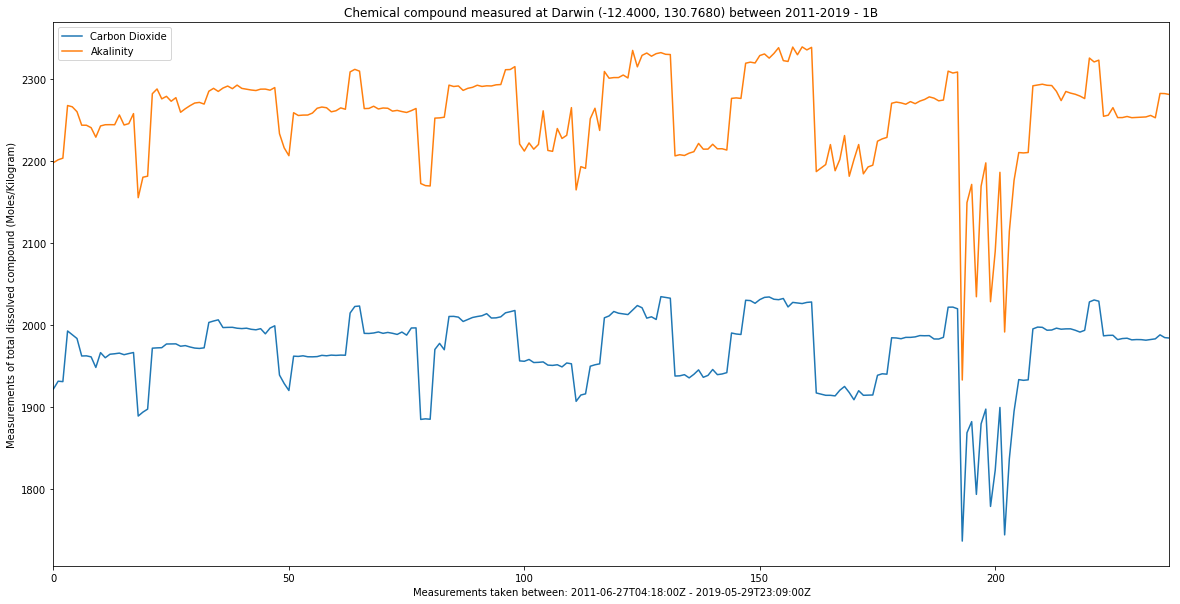

In [58]:
i = 0
for x in chemicals_1B:
    Darwin[chemicals_1B[i]][Darwin[chemicals_1B[i]] > -0.01].plot() #Gets rid of N/A results
    i += 1
    
plt.title("Chemical compound measured at Darwin (-12.4000, 130.7680) between 2011-2019 - 1B")    
plt.legend(["Carbon Dioxide", "Akalinity"])
plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
plt.ylabel("Measurements of total dissolved compound (Moles/Kilogram)")
  

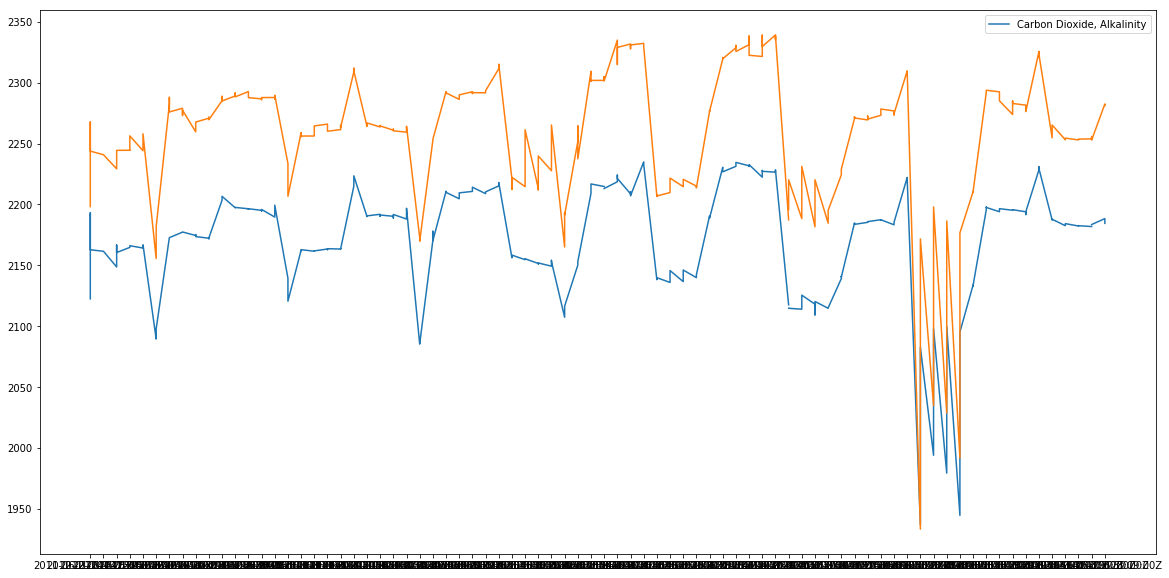

In [81]:
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["CO2_UMOL_PER_KG"] + 200)
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["ALKALINITY_UMOL_PER_KG"])
plt.legend(["Carbon Dioxide", "Alkalinity"])

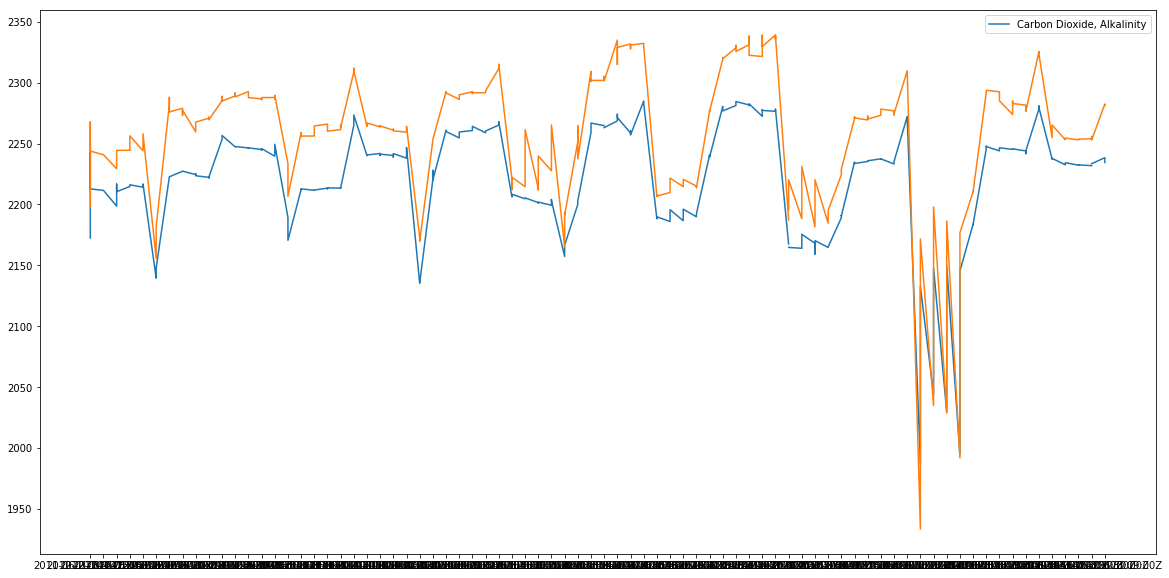

In [82]:
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["CO2_UMOL_PER_KG"] + 250)
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["ALKALINITY_UMOL_PER_KG"])
plt.legend(["Carbon Dioxide", "Alkalinity"])

Text(0, 0.5, 'Measurements of total dissolved compound (Moles/Kilogram)')

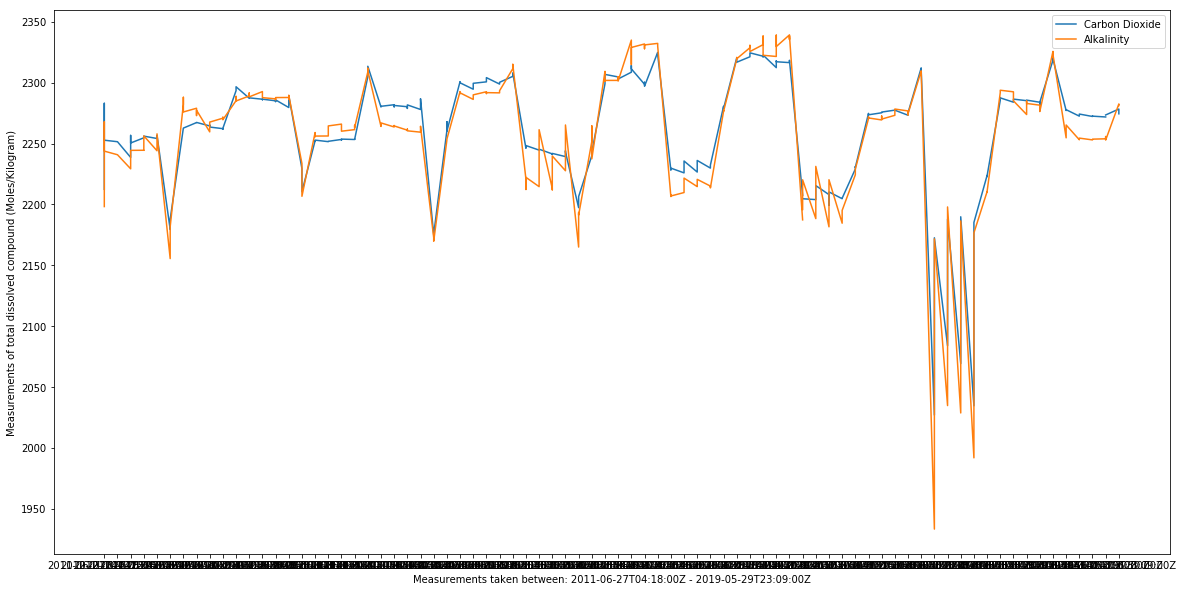

In [85]:
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["CO2_UMOL_PER_KG"] + 290)
plt.plot(Darwin["UTC_TRIP_START_TIME"], Darwin["ALKALINITY_UMOL_PER_KG"])

plt.legend(["Carbon Dioxide", "Alkalinity"])
plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
plt.ylabel("Measurements of total dissolved compound (Moles/Kilogram)")

Text(0, 0.5, 'Measurements of total dissolved compound (Moles/Kilogram)')

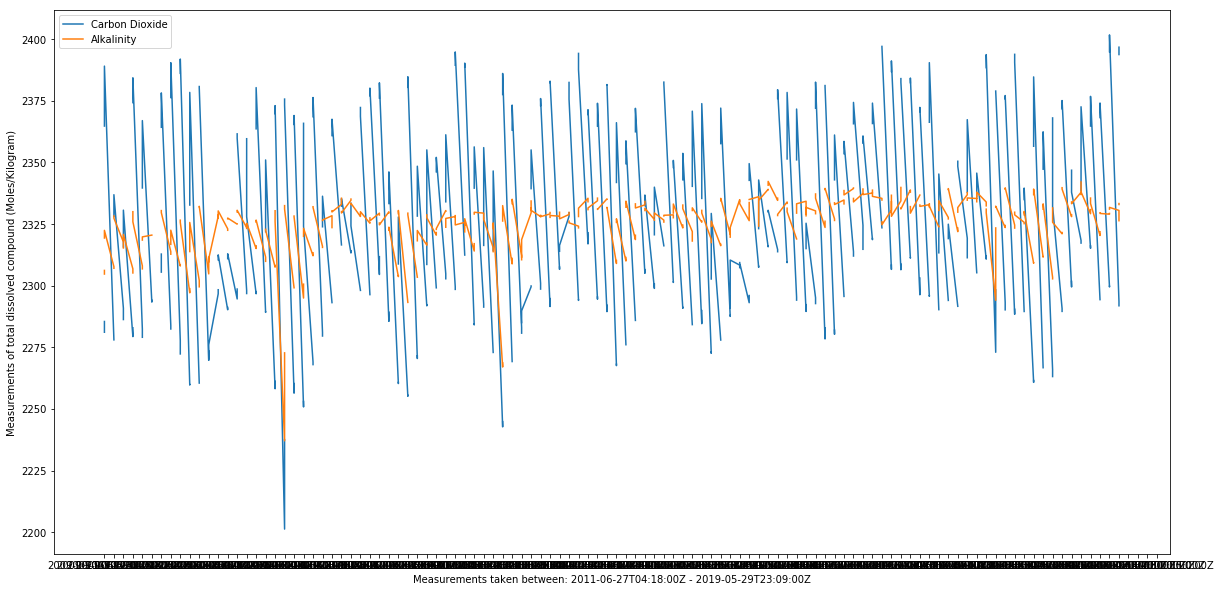

In [86]:
plt.plot(North_Stradbroke["UTC_TRIP_START_TIME"], North_Stradbroke["CO2_UMOL_PER_KG"] + 290)
plt.plot(North_Stradbroke["UTC_TRIP_START_TIME"], North_Stradbroke["ALKALINITY_UMOL_PER_KG"])

plt.legend(["Carbon Dioxide", "Alkalinity"])
plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
plt.ylabel("Measurements of total dissolved compound (Moles/Kilogram)")

Text(0, 0.5, 'Measurements of total dissolved compound (Moles/Kilogram)')

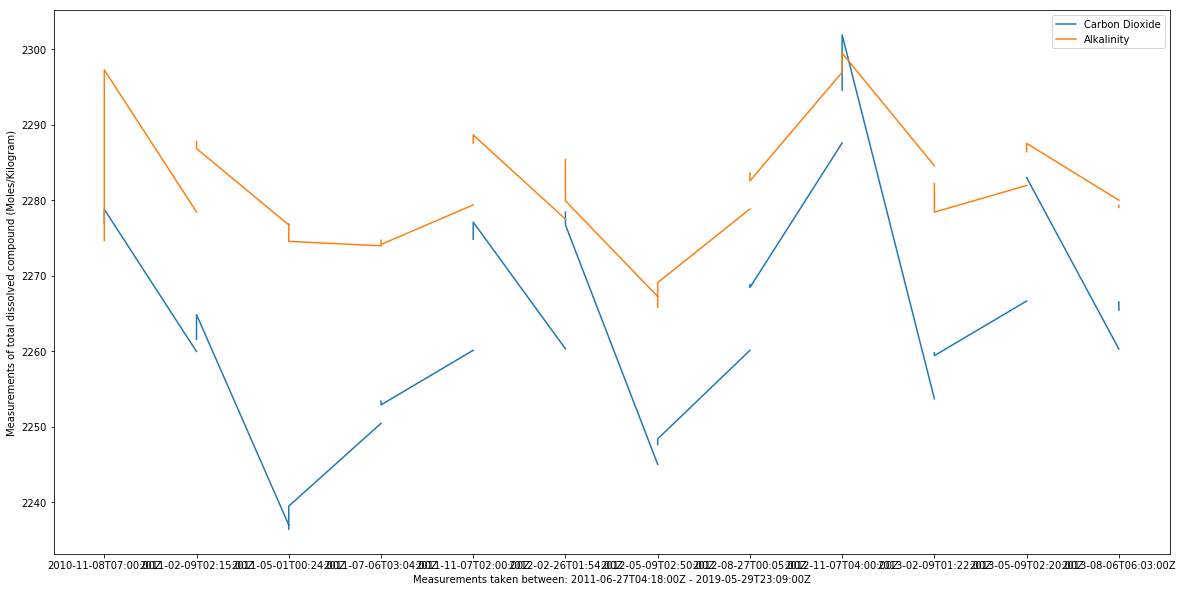

In [87]:
plt.plot(Ningaloo["UTC_TRIP_START_TIME"], Ningaloo["CO2_UMOL_PER_KG"] + 290)
plt.plot(Ningaloo["UTC_TRIP_START_TIME"], Ningaloo["ALKALINITY_UMOL_PER_KG"])

plt.legend(["Carbon Dioxide", "Alkalinity"])
plt.xlabel("Measurements taken between: 2011-06-27T04:18:00Z - 2019-05-29T23:09:00Z")
plt.ylabel("Measurements of total dissolved compound (Moles/Kilogram)")

### Problems?

- CO2 direct relationship with Alkalinity
- About 1/4 of our current CO2 is absorbed by the ocean in process called carbon sequestration 
- shell fish cannot live below saturation horizon
- carbonate compensation depth (CCD)

<img src="CCD.jpg">